In [18]:
import glob #libreria para filtrar todos los datos .csv y importarlos de una 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf #libreria para hacer graficos de vela
import datetime
import matplotlib.dates as mdates #establecer manualmente la frecuencia de las marcas de tiempo en los ejes y mejorar la legibilidad.

In [32]:
print(glob.glob("*.csv"))
coins = ['BTCUSDT.csv', 'DOGEUSDT.csv', 'ETHUSDT.csv', 'HBARUSDT.csv', 'LINKUSDT.csv', 'PAXGUSDT.csv', 'RUNEBUSD.csv', 'THETAUSDT.csv', 'XMRUSDT.csv', 'XRPUSDT.csv']

['BTCUSDT.csv', 'DOGEUSDT.csv', 'ETHUSDT.csv', 'HBARUSDT.csv', 'LINKUSDT.csv', 'PAXGUSDT.csv', 'RUNEBUSD.csv', 'THETAUSDT.csv', 'XMRUSDT.csv', 'XRPUSDT.csv']


In [2]:
files = [file for file in glob.glob('*.csv')]
dfs= {}
for file in files:
    df = pd.read_csv(file, usecols=['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Number of Trades'] ,index_col='Open Time', parse_dates=True)

    dfs[file] = df
    

Empecemos viendo de manera general los promedios y desviaciones estandar de las criptomonedas seleccionadas

In [39]:
for coin in coins:
    print(f'Datos estadisticos de {coin}')
    print(dfs[coin].describe())
    print('\n')

Datos estadisticos de BTCUSDT.csv
               Open          High           Low         Close         Volume  \
count   1463.000000   1463.000000   1463.000000   1463.000000    1463.000000   
mean   26617.554163  27297.845824  25857.797355  26627.956781   97414.254621   
std    15966.124637  16419.222545  15435.048325  15960.849997   97662.245784   
min     4800.010000   5365.420000   3782.130000   4800.000000    8971.480680   
25%    10748.420000  10912.935000  10551.205000  10755.285000   41590.289470   
50%    23327.660000  23897.990000  22850.010000  23342.660000   60951.672986   
75%    38645.350000  39871.655000  37375.690000  38645.350000  104727.698385   
max    67525.820000  69000.000000  66222.400000  67525.830000  760705.362783   

       Number of Trades  
count      1.463000e+03  
mean       2.068456e+06  
std        2.272649e+06  
min        1.913240e+05  
25%        7.237725e+05  
50%        1.212527e+06  
75%        2.194465e+06  
max        1.522359e+07  


Datos est

Se puede ver como la gran mayoria tienen una deviacion estandar demasiado grande, a veces incluso mas grande que la media de la moneda como en el caso de dogecoin, eso nos indica desde ya la gran volatilidad que tiene este mercado

## Se visualizara la evolucion del precio de todas las monedas en los ultimos 4 años

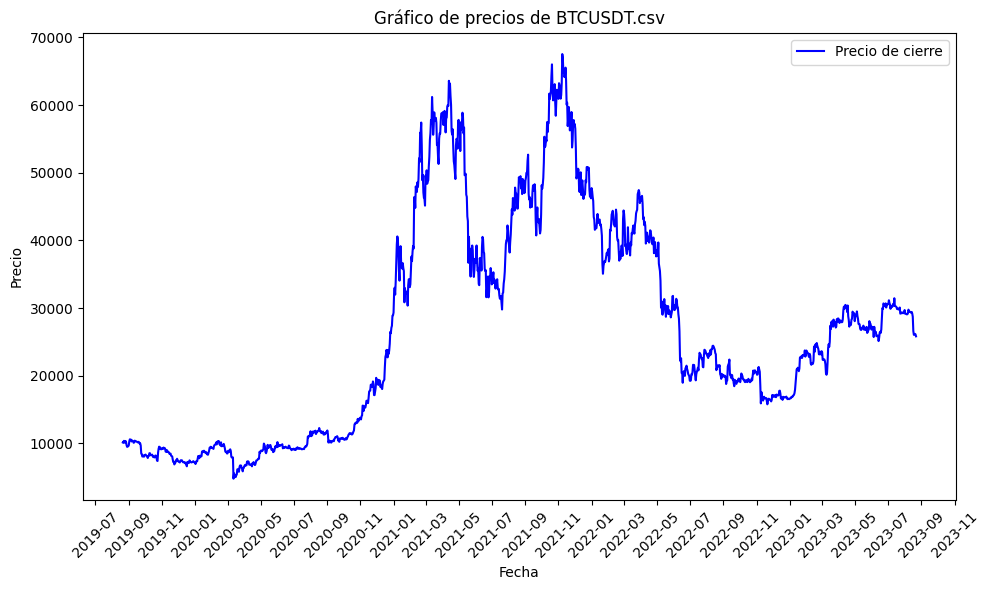

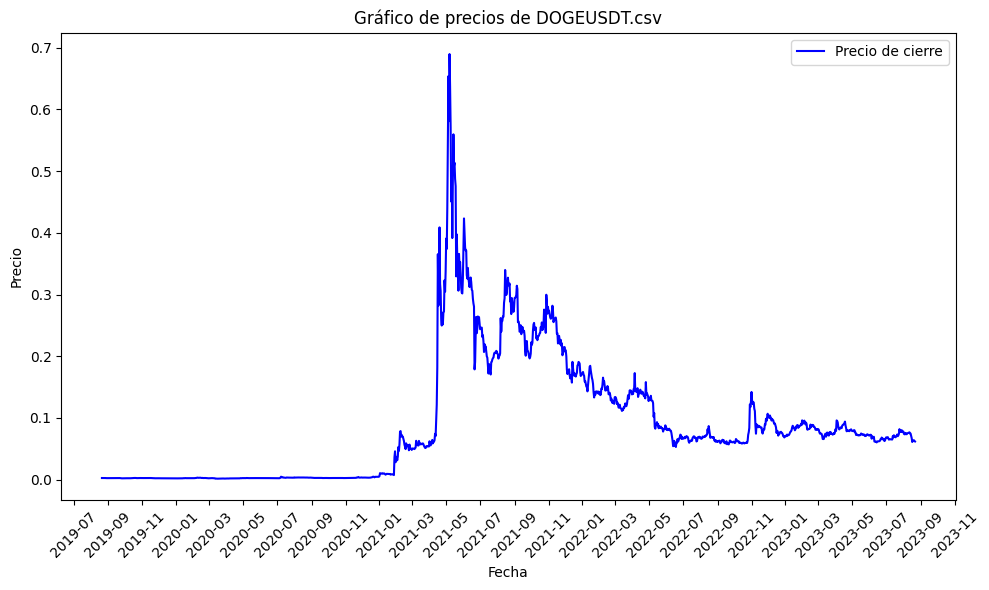

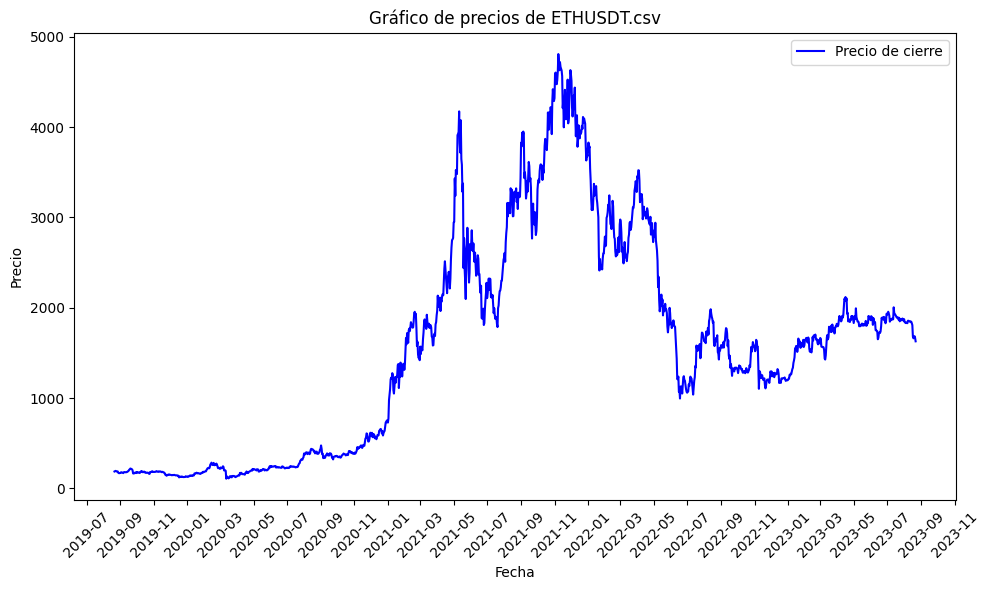

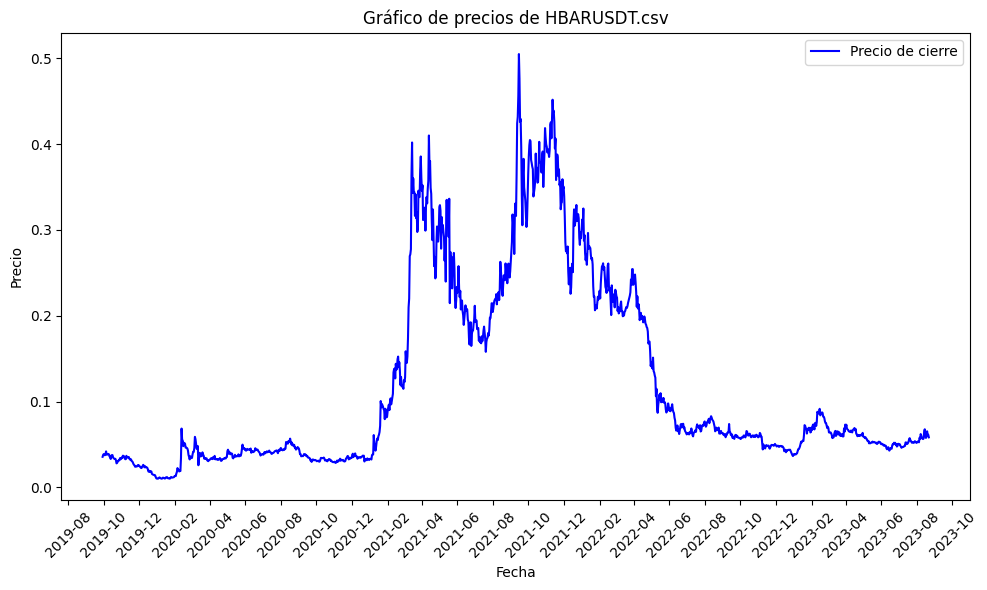

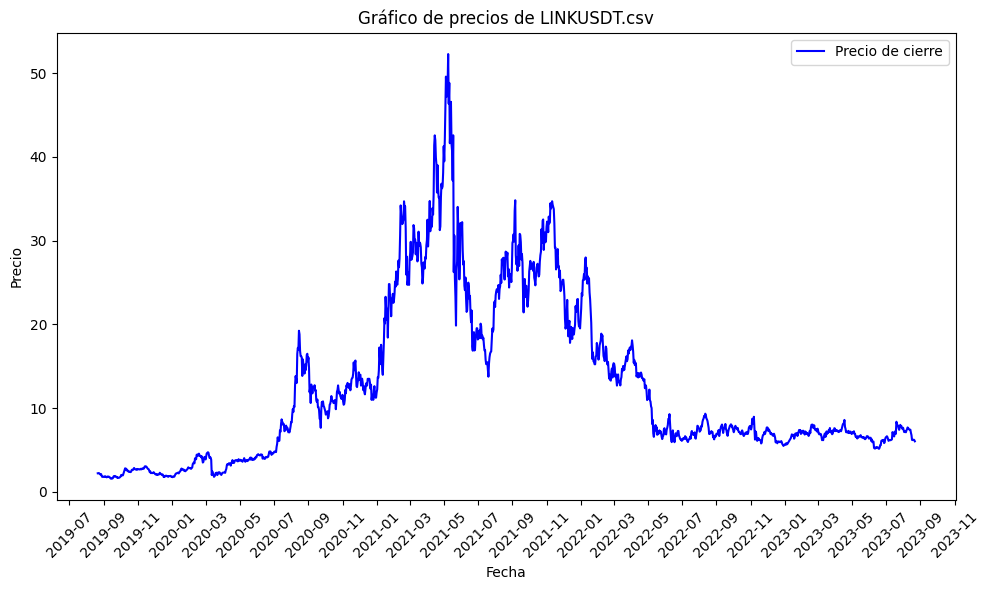

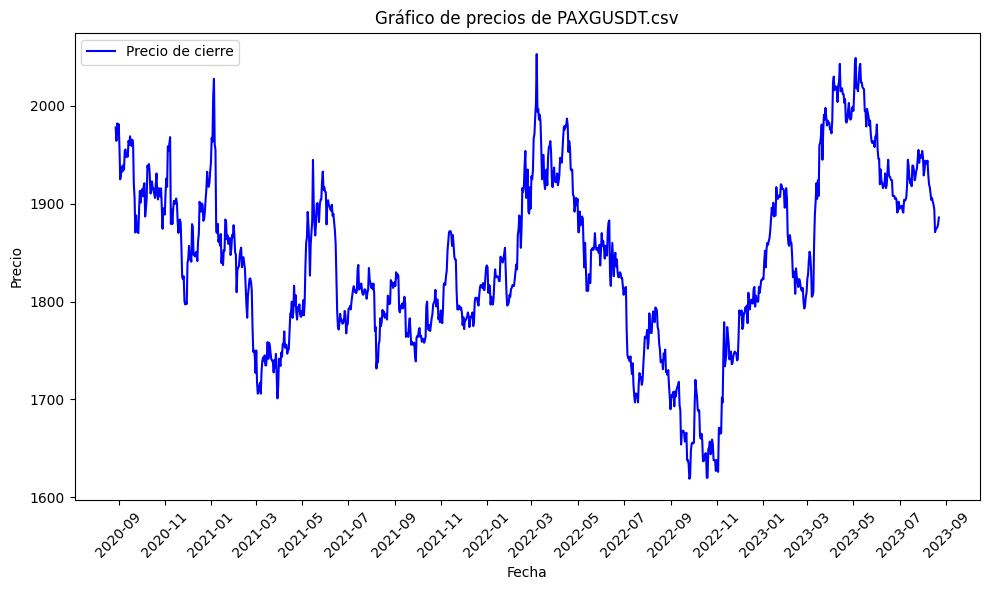

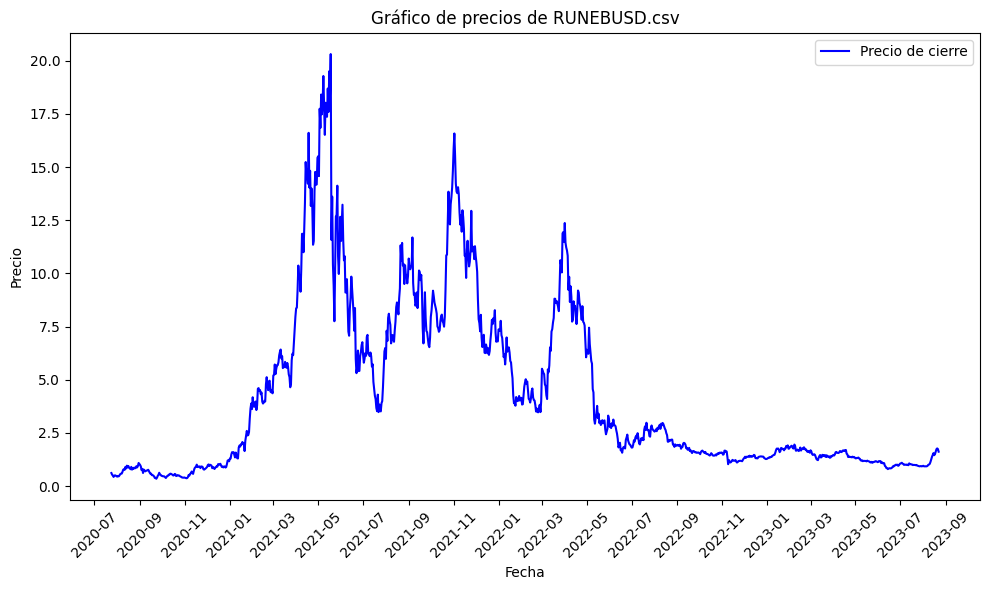

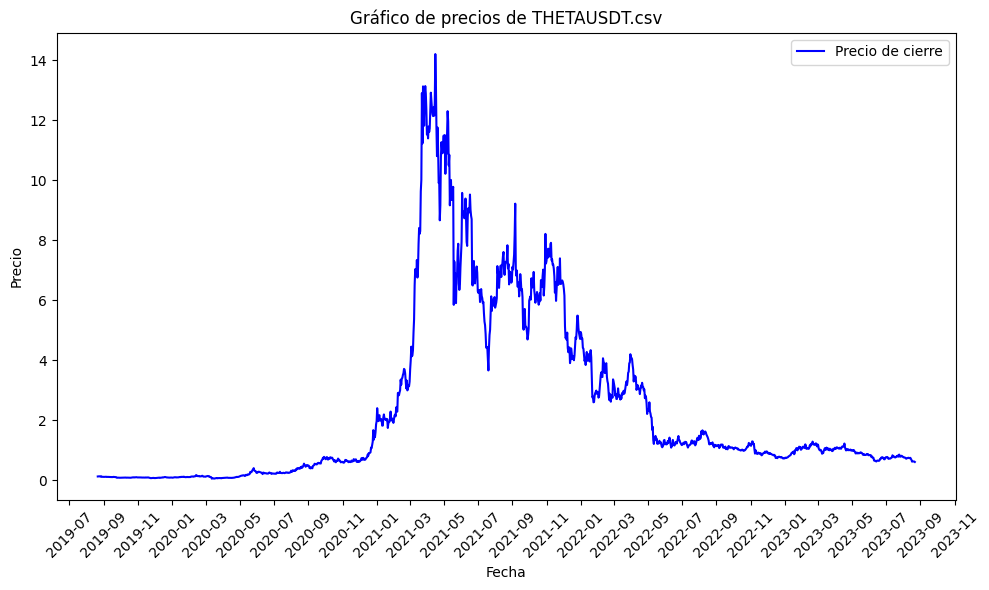

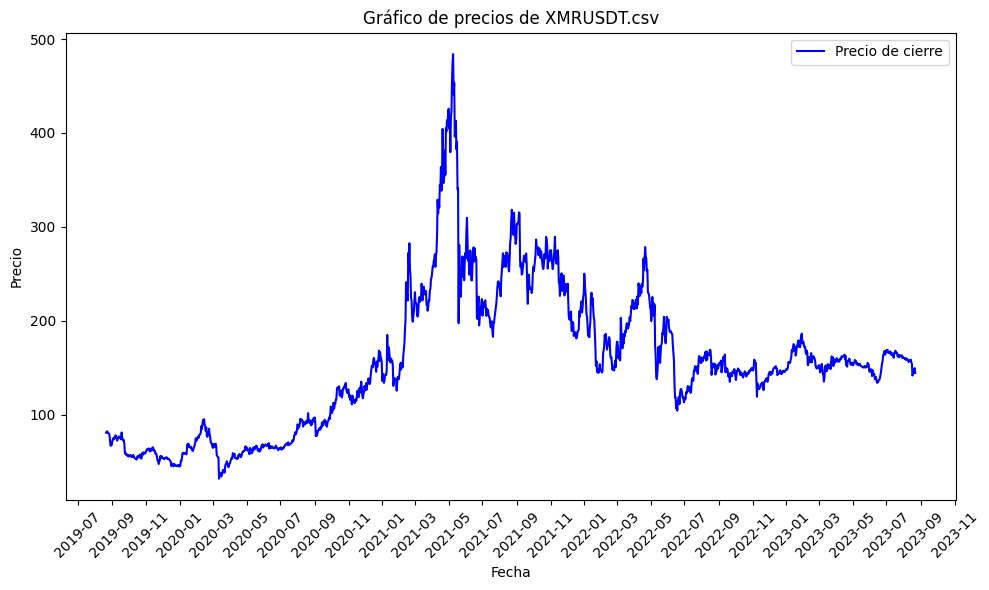

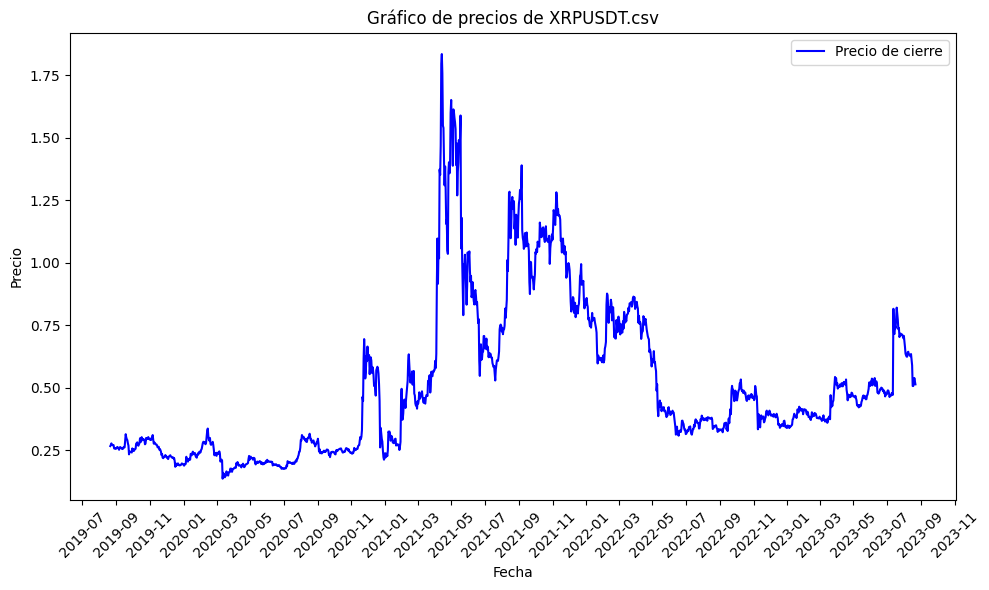

In [6]:

data_trimmed = {crypto: df for crypto, df in dfs.items()}

for crypto, df in data_trimmed.items():
    plt.figure(figsize=(10, 6))

    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # seleccionar el intervalo de meses que iran en el eje x (para mejorar la legibilidad)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    
    plt.plot(df.index, df['Close'], label='Precio de cierre', color='blue')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title(f'Gráfico de precios de {crypto}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Se puede observar el gran mercado alcista que tuvo lugar en el 2021 que afecto a todas las monedas, sin embargo asi como hubo mercado alcista en 2021 tambien podemos ver la eventual caida del precio de todas las monedas en el 2022 con una baja en el precio de mas del 50%, otra conclusion es la obvia influencia del bitcoin en todas las criptomonedas, ¿Que causo el mercado alcista del 2021?, entraron en juego muchos factores mas alla del mercado en si como el auge de los NFT y El Salvador adoptando el bitcoin como moneda de cambio legal [Mas factores aqui](https://www.cnbc.com/2021/12/27/12-key-moments-that-fueled-cryptos-record-growth-in-2021.html#:~:text=The%20milestone%20came%20after%20major,balance%20sheets%20to%20buy%20bitcoin.), tambien se cree que ocurrio un [Short squeeze](https://www.investopedia.com/terms/s/shortsqueeze.asp#:~:text=A%20short%20squeeze%20is%20an,betting%20on%20its%20price%20falling.).

## Grafico de velas

Para Tener una mejor compresión del grafico de velas comparto una imagen acerca de la estructura de estos graficos, en el grafico uso una media movil de 20 periodos, lo cual ayuda a aclarar la tendencia actual de la moneda gracias a que las medias moviles traen el promedio del precio en un periodo determinado, para entender mejor las medias moviles recomiendo leer [Medias Moviles](https://admiralmarkets.com/es/education/articles/forex-indicators/media-movil-simple)

![Velas](https://murciaeconomia.com/upload/img/periodico/img_55684.jpg)

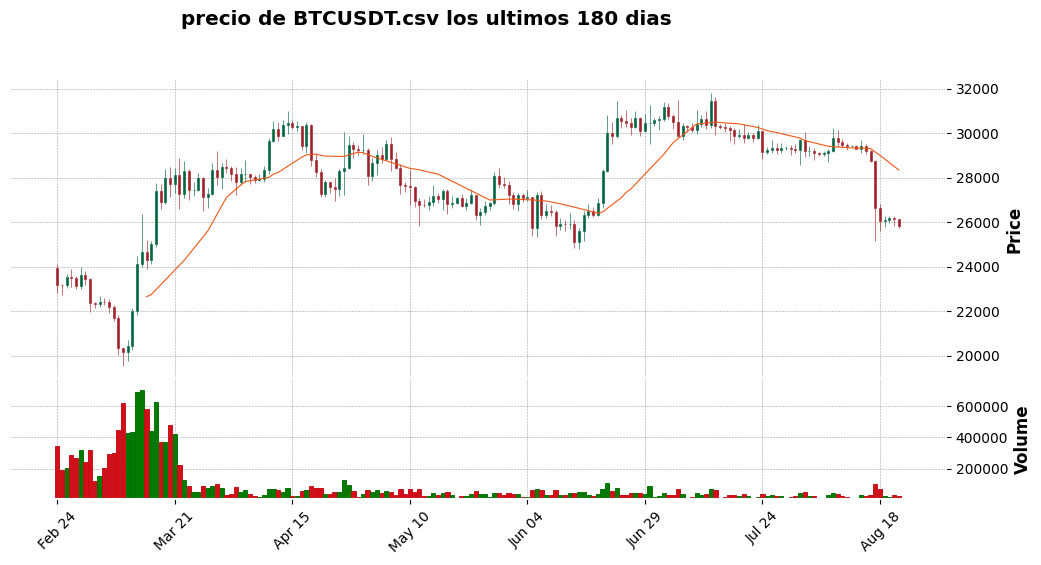

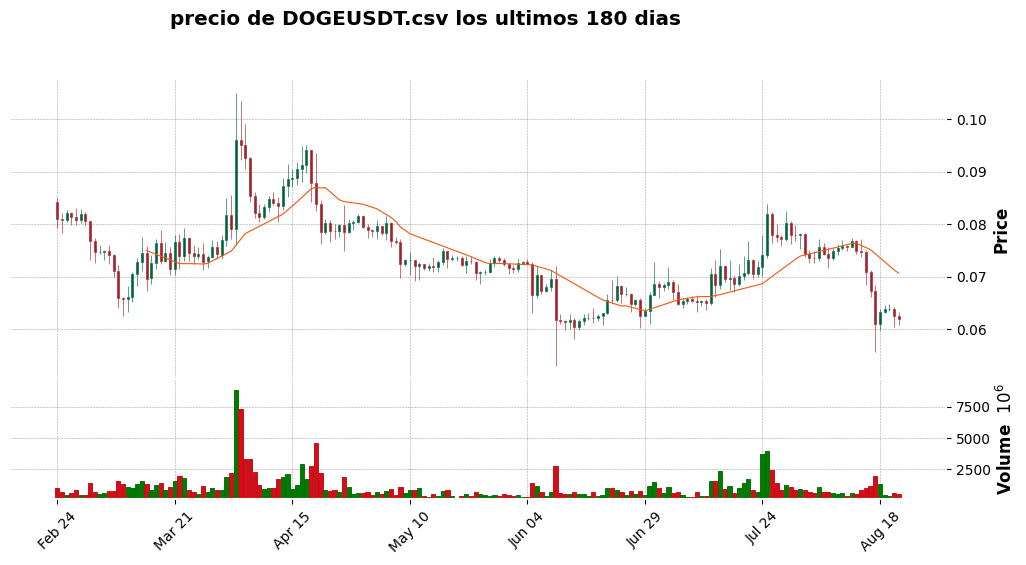

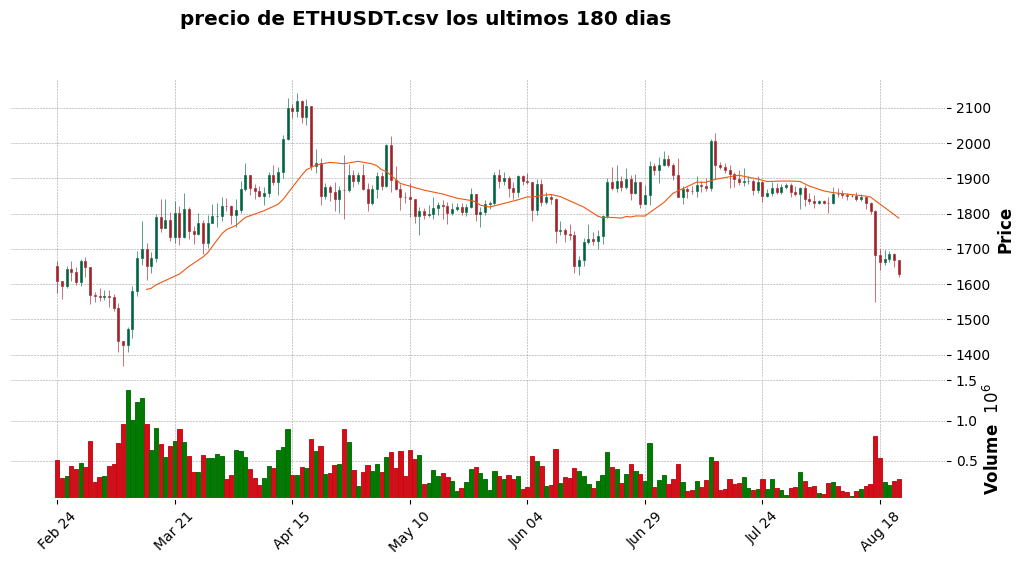

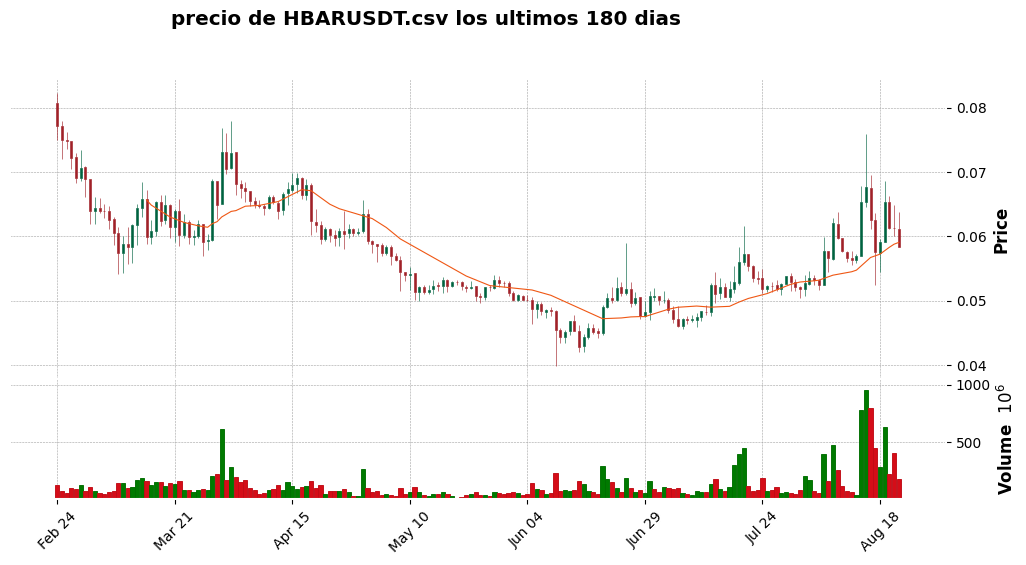

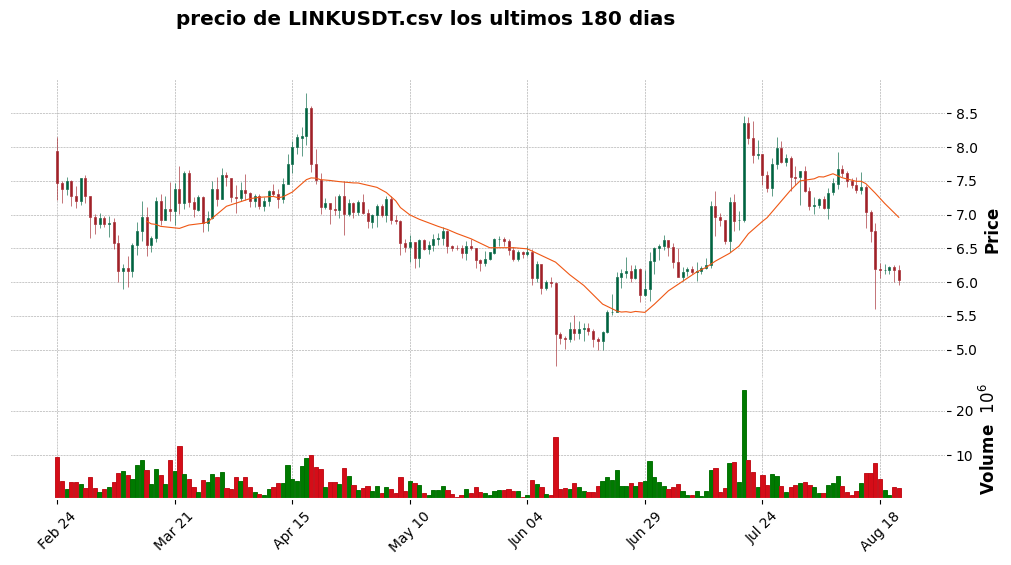

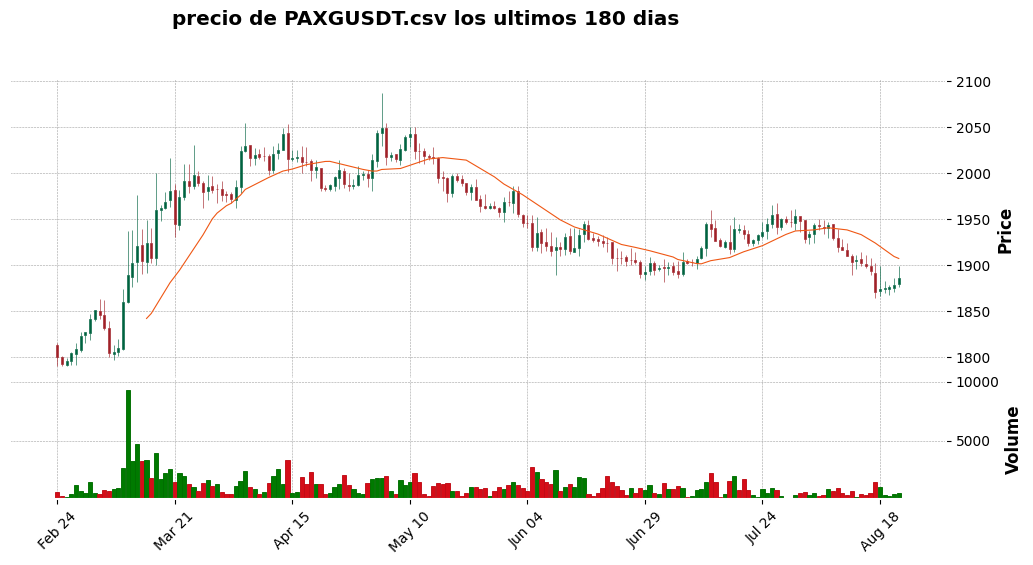

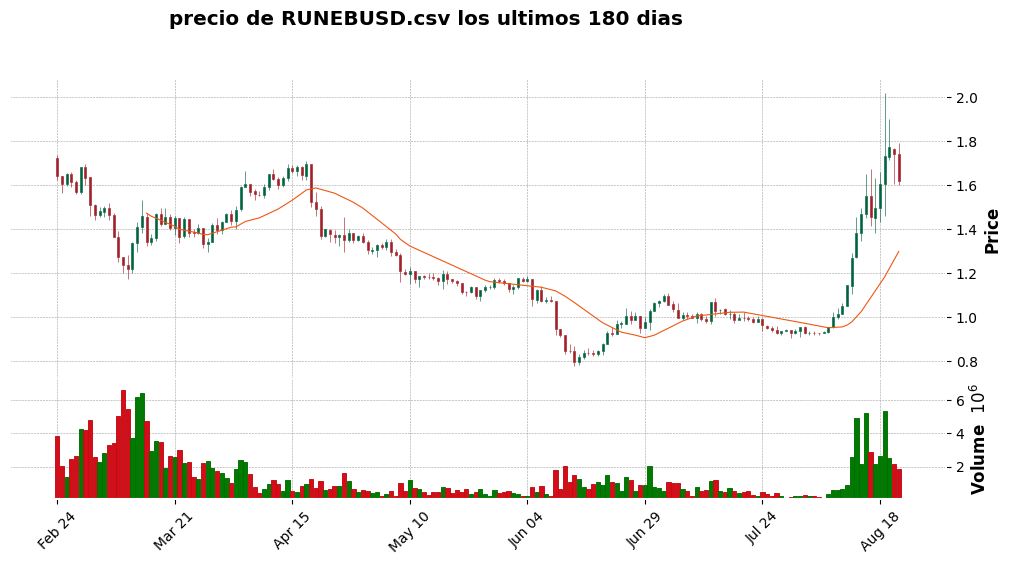

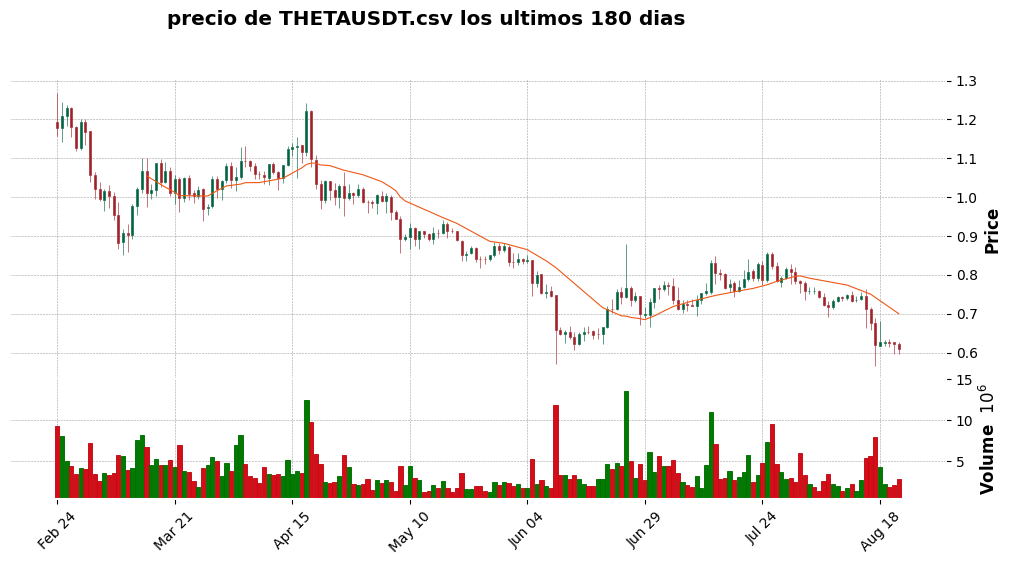

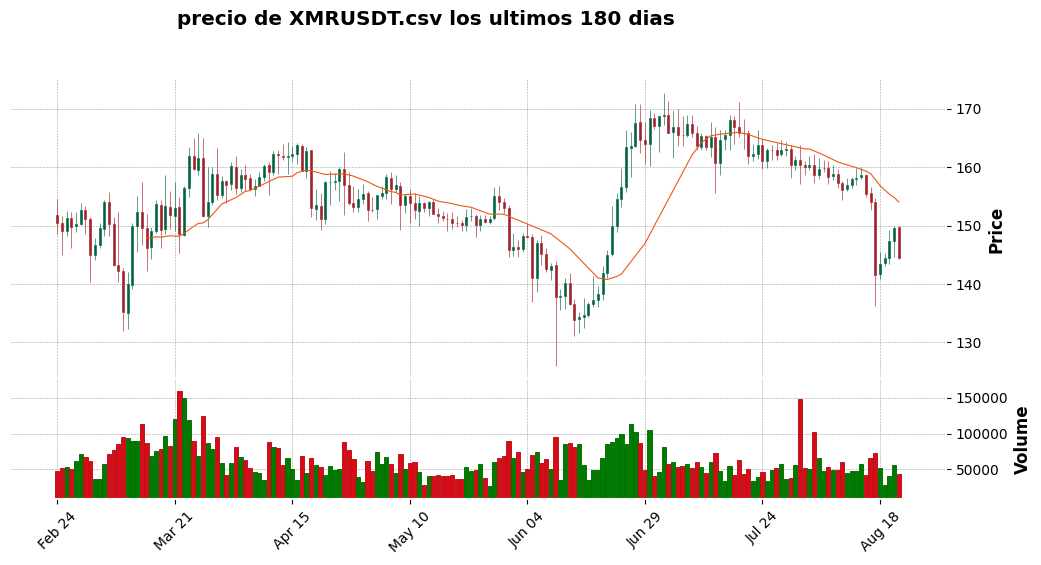

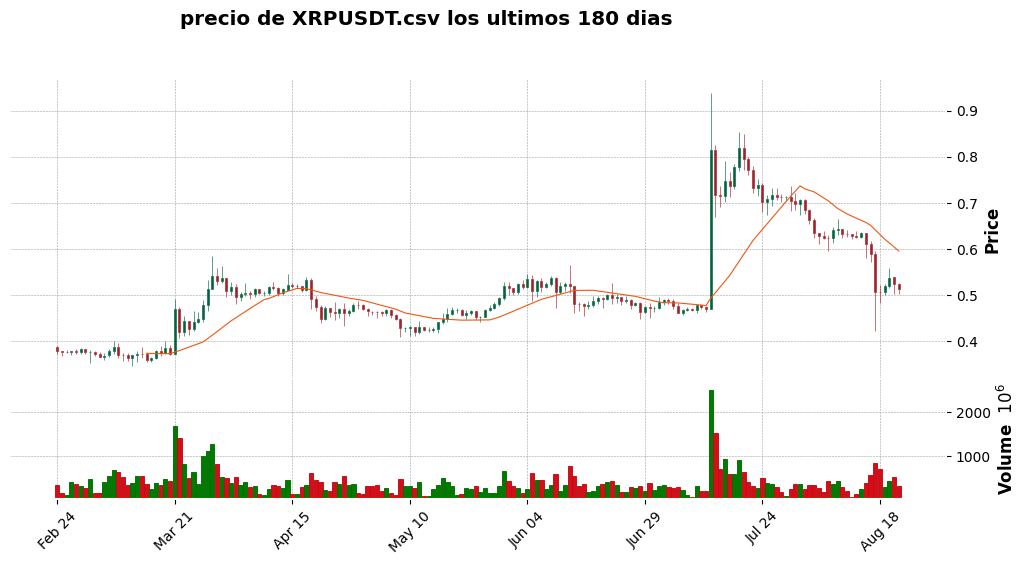

In [7]:
for crypto, df in dfs.items():
    mpf.plot(dfs[crypto].tail(180), type='candle', volume=True, mav=(20), style='charles', figsize=(13,6), title=f'precio de {crypto} los ultimos 180 dias')


## Precio medio vs Desviacion estandar
grafiquemos la desviacion estandar para cada moneda.

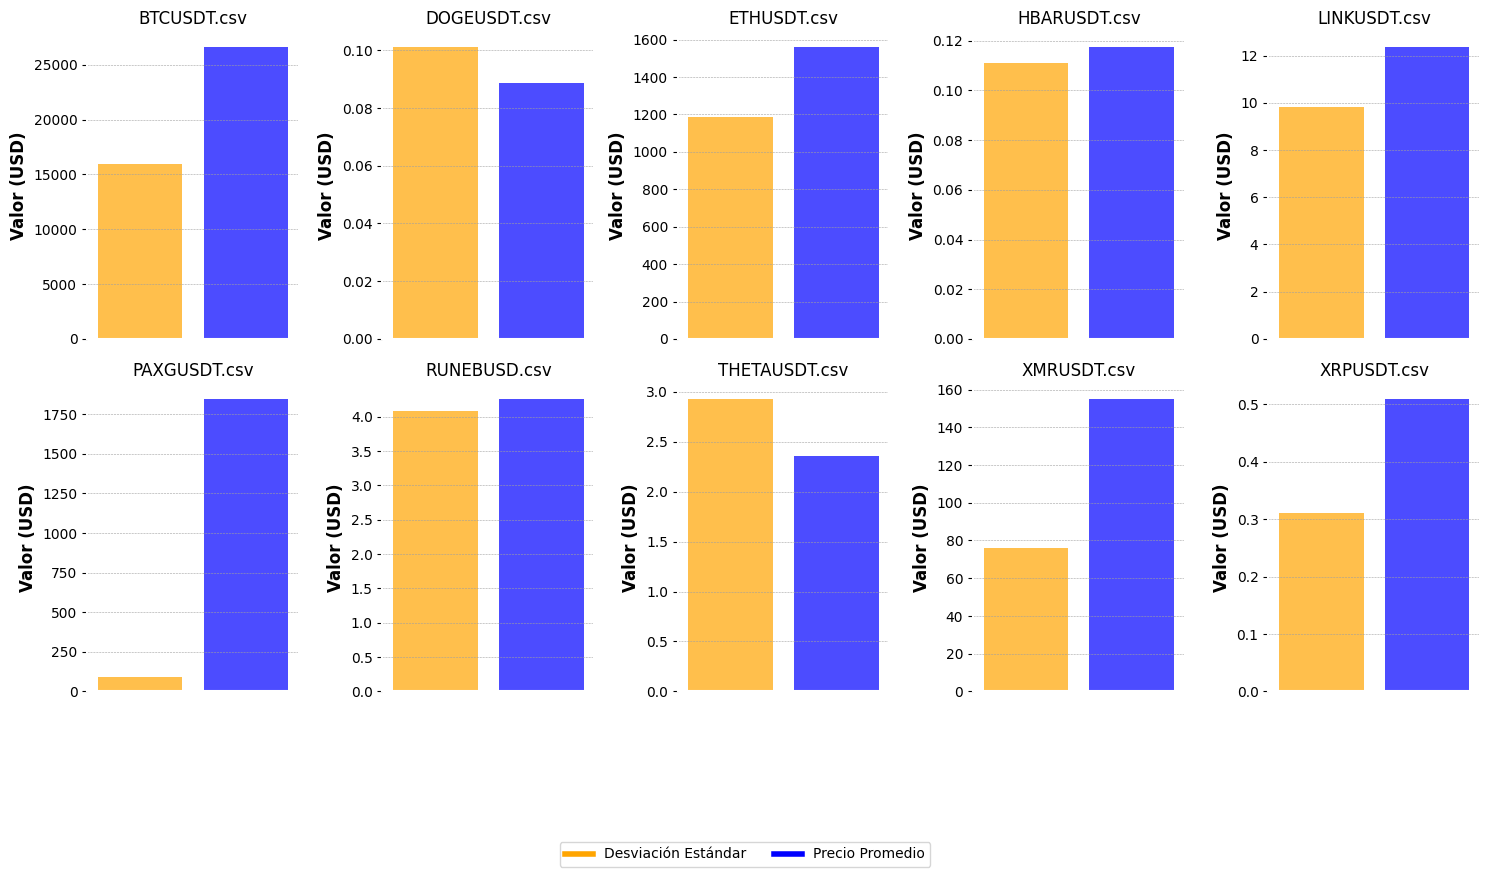

In [40]:
desviaciondic = {crypto: df['Close'].agg(['std', 'mean']) for crypto, df in dfs.items()}

# Obtener la cantidad de filas y columnas para la matriz de gráficos
num_rows = 2
num_cols = (len(desviaciondic) + 1) // num_rows

# Crear una matriz de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
axes = axes.flatten()

# Recorrer las estadísticas y crear un gráfico en cada subplot
for ax, (crypto, statistics) in zip(axes, desviaciondic.items()):
    ax.bar(['Desviación Estándar', 'Precio Promedio'], statistics, color=['orange', 'blue'], alpha=0.7)
    ax.set_ylabel('Valor (USD)')
    ax.set_title(f'{crypto}')
    ax.set_xticks([])
    ax.set_xlim(-0.5, 1.5)


legend_bars = [
    plt.Line2D([0], [0], color='orange', lw=4, label='Desviación Estándar'),
    plt.Line2D([0], [0], color='blue', lw=4, label='Precio Promedio')
]

# Agregar una leyenda única para toda la matriz
fig.legend(handles=legend_bars, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Ajustar el espaciado entre subplots y mostrar el gráfico
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

## Conclusiones que proporcionan una desviacion estandar muy alta
Alta Volatilidad: Una desviación estandar mayor que el precio promedio sugiere que los precios de la moneda varian considerablemente a lo largo del tiempo. Esto podría ser el resultado de cambios rápidos en la demanda, noticias importantes, eventos económicos u otros factores.

Riesgo Potencial: Una desviacion estandar significativamente mayor que el precio promedio puede indicar que invertir en esta moneda conlleva un mayor riesgo. Los inversores deben ser conscientes de la posibilidad de ganancias sustanciales, pero también de pérdidas significativas debido a la alta volatilidad.

Oportunidades de Trading: Para los traders, una alta volatilidad podría presentar oportunidades para comprar a precios bajos y vender a precios más altos, aprovechando los movimientos de precios a corto plazo.

Cuando se observó el precio de las monedas pudimos ver una alta influencia del bitcoin sobre las demas monedas, se graficará con subplots el precio del bitcoin vs las demas monedas para ver si encontramos dependencia

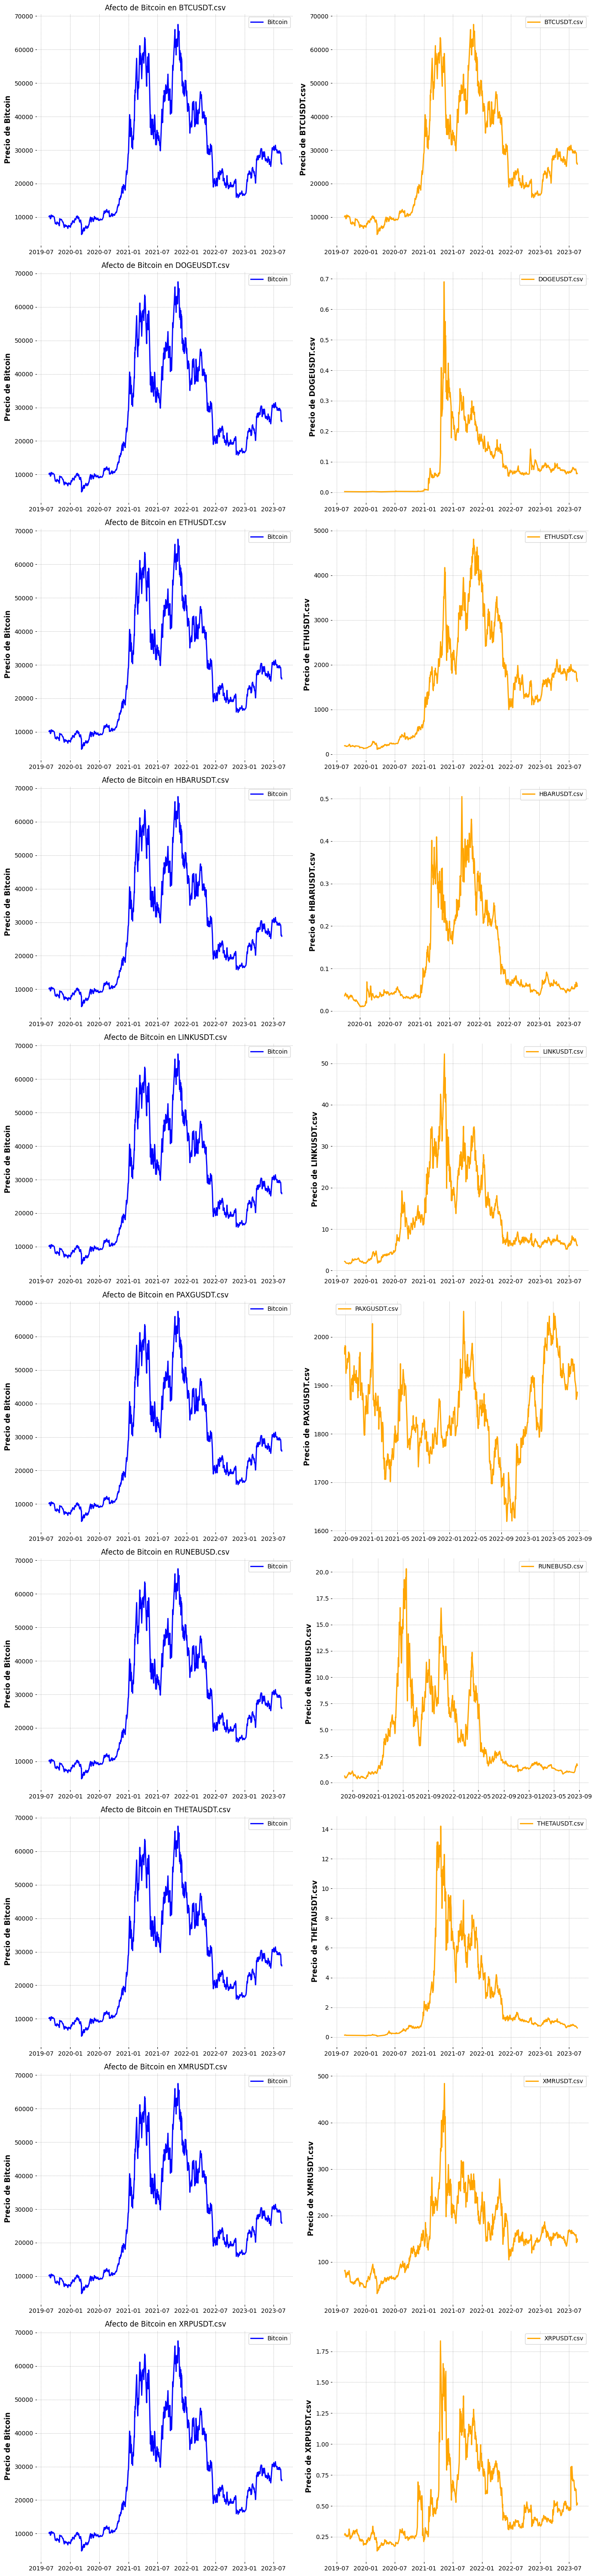

In [41]:
num_rows = len(dfs)
num_cols = 2 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 6 * num_rows))
if num_rows == 1:
    axes = [axes]

for row, (crypto, df) in enumerate(dfs.items()):
    ax1 = axes[row, 0] if num_rows > 1 else axes[0]
    ax2 = axes[row, 1] if num_rows > 1 else axes[1]

    ax1.plot(dfs['BTCUSDT.csv'].index, dfs['BTCUSDT.csv']['Close'], label='Bitcoin', color='blue')
    ax1.set_ylabel('Precio de Bitcoin')
    ax1.set_title(f'Afecto de Bitcoin en {crypto}')
    ax1.legend()

    ax2.plot(df.index, df['Close'], label=crypto, color='orange')
    ax2.set_ylabel(f'Precio de {crypto}')
    ax2.legend()

plt.tight_layout()
plt.show()

Podemos ver una clara dependencia de todas las monedas a bitcoin, incluso el grafico de ethereum es casi el mismo, una de las principales razones de que esto pase es que bitcoin tiene la mayor capitalización de mercado en comparación con otras monedas, esto significa que su valor total es mucho mayor que el de otras monedas, como resultado, los movimientos de precio de bitcoin pueden influir en todo el mercado de criptomonedas. [Mas info](https://decrypt.co/42834/why-do-altcoins-usually-follow-bitcoin)

## Se pudo observar que...
El mercado de criptomonedas es altamente volátil y puede estar influenciado por una gran variedad de factores, incluyendo desarrollos tecnológicos, regulaciones gubernamentales, adopción masiva y eventos económicos globales, como vimos, por ejemplo, con el caso de El Salvador, hay que estar muy alerta de cualquier noticia las 24 horas del dia, ya que a diferencia de la bolsa tradicional el mercado cripto nunca se detiene, se pueden obtener muchas ganancias asi como grandes perdidas.